<a href="https://colab.research.google.com/github/Tdas-christ/Reinforcement_Learning/blob/main/2348569_RL_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Define the ad slots and their "true" CTRs (simulated, for example purposes)
ad_slots = ['Top Banner', 'Sidebar', 'Footer', 'Pop-up']
true_ctrs = [0.05, 0.03, 0.02, 0.08]  # True click-through rates for each ad slot

In [ ]:
# Number of impressions
num_impressions = 1000

In [ ]:
# Epsilon-greedy parameters
epsilon = 0.1  # Exploration rate (10%)
num_slots = len(ad_slots)

In [ ]:
# Initialize estimated CTRs and counts for each ad slot
estimated_ctrs = [0.0] * num_slots  # Starting estimated CTR for each slot
slot_counts = [0] * num_slots  # Count of how many times each slot has been selected

In [ ]:
# Function to simulate a click based on the true CTR
def simulate_click(slot):
    return 1 if random.random() < true_ctrs[slot] else 0

In [14]:
# Epsilon-Greedy Algorithm
total_rewards = 0
rewards_history = []
estimated_ctrs_history = np.zeros((num_impressions, num_slots))

In [15]:
for i in range(num_impressions):
    if random.random() < epsilon:
        selected_slot = random.randint(0, num_slots - 1)  # Explore
    else:
        selected_slot = np.argmax(estimated_ctrs)  # Exploit

    reward = simulate_click(selected_slot)

    # Update the slot's count and estimated CTR
    slot_counts[selected_slot] += 1
    estimated_ctrs[selected_slot] += (reward - estimated_ctrs[selected_slot]) / slot_counts[selected_slot]

    # Update total rewards
    total_rewards += reward
    rewards_history.append(total_rewards)
    estimated_ctrs_history[i] = estimated_ctrs  # Record estimated CTRs

In [16]:
# Final results
print("Ad Slot Performance After 1000 Impressions:")
for slot in range(num_slots):
    print(f"{ad_slots[slot]}: Estimated CTR = {estimated_ctrs[slot]:.4f}, Selected {slot_counts[slot]} times")

# Total clicks
print(f"\nTotal Clicks after {num_impressions} impressions: {total_rewards}")


Ad Slot Performance After 1000 Impressions:
Top Banner: Estimated CTR = 0.0432, Selected 2757 times
Sidebar: Estimated CTR = 0.0000, Selected 74 times
Footer: Estimated CTR = 0.0282, Selected 71 times
Pop-up: Estimated CTR = 0.0408, Selected 98 times

Total Clicks after 1000 impressions: 39


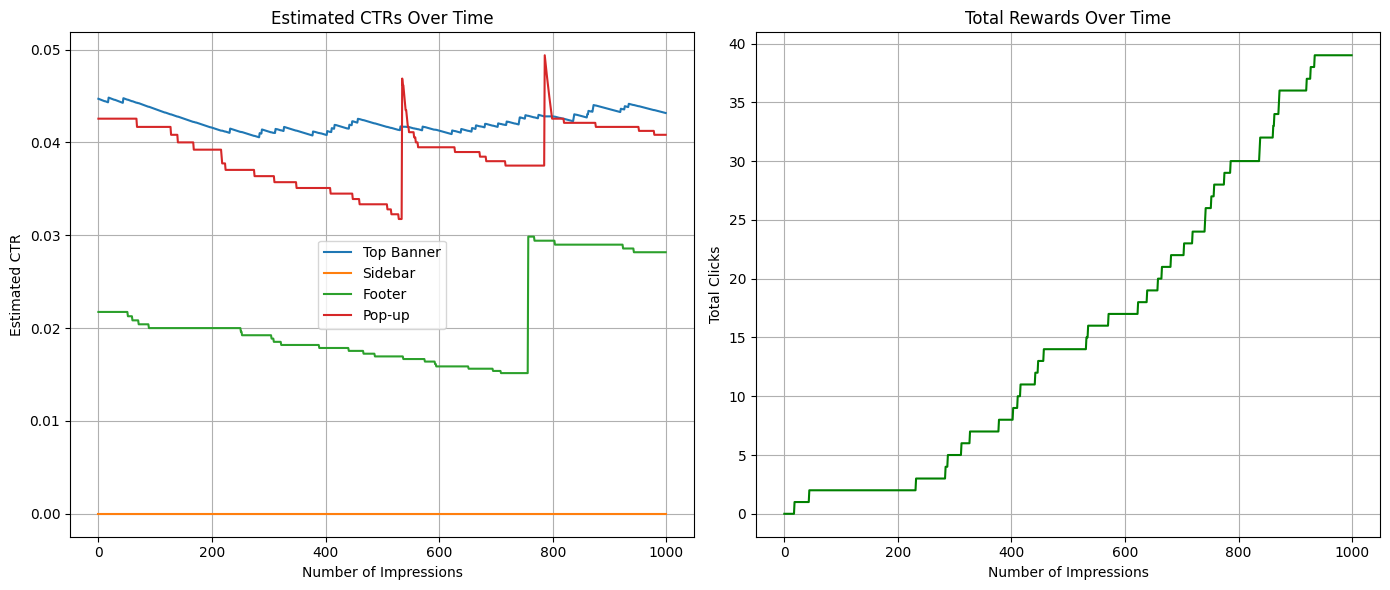

In [17]:
# Visualization
plt.figure(figsize=(14, 6))

# Plot estimated CTRs over time
plt.subplot(1, 2, 1)
for slot in range(num_slots):
    plt.plot(estimated_ctrs_history[:, slot], label=ad_slots[slot])
plt.title('Estimated CTRs Over Time')
plt.xlabel('Number of Impressions')
plt.ylabel('Estimated CTR')
plt.legend()
plt.grid()

# Plot total rewards over time
plt.subplot(1, 2, 2)
plt.plot(rewards_history, label='Total Rewards', color='green')
plt.title('Total Rewards Over Time')
plt.xlabel('Number of Impressions')
plt.ylabel('Total Clicks')
plt.grid()

plt.tight_layout()
plt.show()